In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('Customer Churn Prediction - 1.csv')


In [3]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop(['customerID'], axis = 'columns', inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
pd.to_numeric(df.SeniorCitizen, errors='coerce' )
pd.to_numeric(df.tenure, errors='coerce' )
pd.to_numeric(df.MonthlyCharges, errors='coerce' )
pd.to_numeric(df.TotalCharges, errors='coerce' )

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
df.tenure.dtypes

dtype('int64')

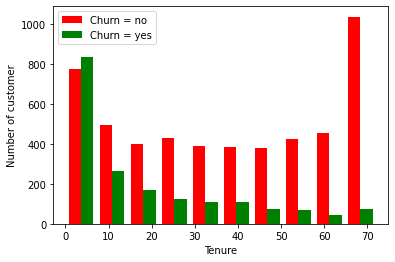

In [7]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure
plt.xlabel("Tenure")
plt.ylabel("Number of customer")

plt .hist([tenure_churn_no, tenure_churn_yes], color = ['red', 'green'], label = ['Churn = no', 'Churn = yes'], linewidth = 0.3)
plt.legend()

(array([[1458.,  134.,  246.,  487.,  420.,  545.,  598.,  550.,  485.,
          251.],
        [ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 BarContainer objects>)

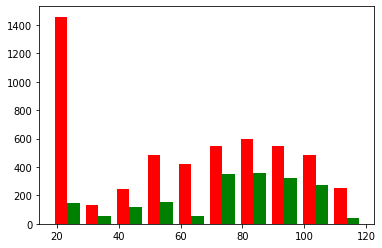

In [8]:
monthly_charges_churn_no = df[df.Churn == 'No'].MonthlyCharges
monthly_charges_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges
plt.hist([monthly_charges_churn_no, monthly_charges_churn_yes], color = ['red', 'green'], label = ['churn= no', 'churn = yes'])

In [9]:

df.MonthlyCharges.value_counts()



20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [10]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [11]:
def print_col_unique_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [12]:
print_col_unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [13]:
df.replace('No internet service', 'No', inplace = True)
df.replace('No phone service', 'No', inplace = True)

In [14]:
print_col_unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'
                ]
for col in yes_no_columns:
    df[col].replace({'Yes': 1, 'No' : 0}, inplace=True)

In [16]:
print_col_unique_values(df)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [17]:
df['gender'].replace({'Male':0, 'Female':1}, inplace=True)

In [18]:
df1 = pd.get_dummies(data = df, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [19]:
col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])


In [20]:
df1.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5466,0,0,0,1,0.138889,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4847,1,1,0,0,0.513889,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3897,1,0,1,1,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
4888,0,0,0,0,0.611111,1,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


In [21]:
X = df1.drop('Churn', axis = 'columns')
Y = df1['Churn']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 5)

In [41]:
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(20, input_shape=(26,), activation = 'relu'),
                          keras.layers.Dense(1, activation = 'sigmoid'),
                         ])


model.compile(optimizer = 'adam',
             loss = 'mean_squared_error',
             metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
177/177 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.7219
Epoch 2/5
177/177 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.7368
Epoch 3/5
177/177 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.7368
Epoch 4/5
177/177 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.7368
Epoch 5/5
177/177 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.7368


In [38]:
model.evaluate(X_test, Y_test)

45/45 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.7260


[nan, 0.7260468602180481]

In [39]:
yp = model.predict(X_test)
yp[:5]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)